In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

## task 01

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [2]:
loc = 1.06
scales = np.arange(0.035, 0.038, 0.0001)
prob = [int(stats.norm(loc, scale).cdf(1)*10000)/10000 for scale in scales]
d = pd.DataFrame(list(zip(scales, prob)), columns = ['scale', 'prob'])
d['diff'] = abs(d['prob'] - 0.05)
# d.head(20)

In [3]:
scale = d.loc[d['diff'] == min(d['diff']), 'scale']
scale

15    0.0365
Name: scale, dtype: float64

In [4]:
# ?stats.norm

In [5]:
prob = 1 - stats.norm(loc, scale).cdf(1.1)
prob[0]

0.13656336797447788

## task 02

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.

In [6]:
a = 12
b = 14

In [7]:
M = (a + b)/2
D = (b - a)**2 / 12

In [8]:
n = 30
loc = n * M
scale = (D * n) ** 0.5
loc, scale

(390.0, 3.1622776601683795)

In [9]:
box = stats.norm(loc, scale)

In [10]:
prob1 = box.cdf(390)
prob1

0.5

In [11]:
prob2 = 1 - box.cdf(395)
prob2

0.056923149003329065

In [12]:
prob3 = 1 - box.cdf(380) - (1 - box.cdf(400))
prob3

0.9984345977419975

## task 03

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

In [13]:
N = [1, 2, 5, 30]

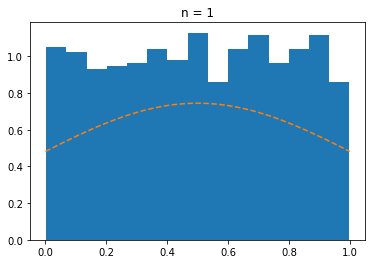

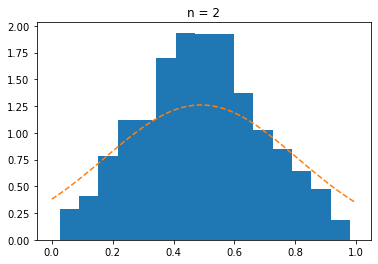

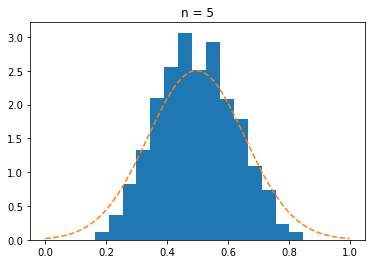

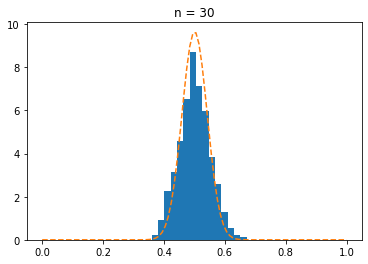

In [14]:
for n in N:
    mean_values = []
    for k in range(1000):
        sample = stats.uniform.rvs(loc = 0, scale = 1, size = n, random_state = None)
        mean_value = sample.mean()
        mean_values.append(mean_value)
    
    M = np.mean(mean_values)
    D = np.std(mean_values)

    nloc = M
    nscale = (D / n) ** 0.5
    
    ox = np.linspace(0, 1, 100)
    oy = np.array(stats.norm(loc = nloc, scale = nscale).pdf(ox))
    plt.hist(mean_values, bins = 15, density = True)
    plt.plot(ox, oy, linestyle = 'dashed')
    plt.title(f'n = {n}')
    plt.show()